<a href="https://colab.research.google.com/github/Gopikanta/Deep-Learning---LAB/blob/main/Copy_of_Deep_learning_second_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I Build a small Convolutional Neural Network (CNN) model using any of deep libraries for:
a) Image Recognition/ Classification
b) Digit Identification

**a) Image Recognition/ Classification**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load and preprocess the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)



4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.5856 - accuracy: 0.7836 - val_loss: 0.4129 - val_accuracy: 0.8486
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3619 - accuracy: 0.8686 - val_loss: 0.3383 - val_accuracy: 0.8757
Epoch 3/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3041 - accuracy: 0.8901 - val_loss: 0.3083 - val_accuracy: 0.8899
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2720 - accuracy: 0.9006 - val_loss: 0.2938 - val_accuracy: 0.8919
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2487 - accuracy: 0.9089 - val_loss: 0.2760 - val_accuracy: 0.9003
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2297 - accuracy: 0.9161 - val_loss: 0.2731 - val_accuracy: 0.9002
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2106 - ac

**b) Digit Identification**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/20
750/750 [==============================] - 6s 5ms/step - loss: 0.2183 - accuracy: 0.9345 - val_loss: 0.0830 - val_accuracy: 0.9760
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.0584 - val_accuracy: 0.9836
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0548 - val_accuracy: 0.9817
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0308 - accuracy: 0.9895 - val_loss: 0.0424 - val_accuracy: 0.9873
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0343 - val_accuracy: 0.9900
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0539 - val_accuracy: 0.9853
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0486 - val_accuracy: 0.9859
Epoch 

# II How to use Pre-trained CNN models for feature extraction

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import VGG16
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_images, _), (_, _) = datasets.cifar10.load_data()
train_images = train_images.astype('float32') / 255

# Load pre-trained VGG16 model without top (fully connected) layers
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Extract features using pre-trained VGG16 model
features = vgg16_model.predict(train_images)

# Flatten the features
features_flattened = np.reshape(features, (features.shape[0], -1))

print('Features shape:', features_flattened.shape)


1563/1563 [==============================] - 11s 6ms/step
Features shape: (50000, 512)


# III Implementation of Pre-trained CNN models using transfer learning for
# classification/object detections.
a) AlexNet
b) VGG-16

**a) AlexNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

def AlexNet(input_shape, num_classes):
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
        layers.BatchNormalization(),

        # Fourth convolutional layer
        layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
        layers.BatchNormalization(),

        # Fifth convolutional layer
        layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Flatten layer
        layers.Flatten(),

        # Fully connected layers
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Define input shape
input_shape = (32, 32, 3)

# Instantiate AlexNet model
model = AlexNet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
625/625 [==============================] - 22s 24ms/step - loss: 1.8925 - accuracy: 0.3438 - val_loss: 1.8531 - val_accuracy: 0.3566
Epoch 2/10
625/625 [==============================] - 14s 23ms/step - loss: 1.6186 - accuracy: 0.4257 - val_loss: 1.7374 - val_accuracy: 0.3667
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 1.4609 - accuracy: 0.4884 - val_loss: 1.3465 - val_accuracy: 0.5229
Epoch 4/10
625/625 [==============================] - 14s 23ms/step - loss: 1.3399 - accuracy: 0.5304 - val_loss: 1.5007 - val_accuracy: 0.4612
Epoch 5/10
625/625 [==============================] - 14s 23ms/step - loss: 1.2405 - accuracy: 0.5698 - val_loss: 1.2878 - val_accuracy: 0.5573
Epoch 6/10
625/625 [==============================] - 14s 23ms/step - loss: 1.1153 - accuracy: 0.6123 - val_loss: 1.2867 - val_accuracy: 0.5586
Epoch 7/10
625/625 [==============================] - 14s 22ms/step - loss: 1.0019 - accuracy: 0.6531 - val_loss: 1.2498 - val_accuracy:

**b) VGG-16**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Now you can use TensorFlow functionalities
# Your code here...


## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 [==============================] - 16s 133ms/step - loss: 1.6142 - accuracy: 0.4866 - val_loss: 1.0502 - val_accuracy: 0.5895
Epoch 2/50
65/65 [==============================] - 5s 80ms/step - loss: 0.9059 - accuracy: 0.6968 - val_loss: 1.0368 - val_accuracy: 0.6226
Epoch 3/50
65/65 [==============================] - 5s 84ms/step - loss: 0.6199 - accuracy: 0.7655 - val_loss: 0.9318 - val_accuracy: 0.6712
Epoch 4/50
65/65 [==============================] - 5s 81ms/step - loss: 0.4293 - accuracy: 0.8331 - val_loss: 0.9053 - val_accuracy: 0.6926
Epoch 5/50
65/65 [==============================] - 6s 86ms/step - loss: 0.3383 - accuracy: 0.8652 - val_loss: 1.0535 - val_accuracy: 0.7004
Epoch 6/50
65/65 [==============================] - 5s 83ms/step - loss: 0.2822 - accuracy: 0.8939 - val_loss: 1.0755 - val_accuracy: 0.6965
Epoch 7/50
65/65 [==============================] - 6s 86ms/step - loss: 0.2070 - accuracy: 0.9255 - val_loss: 1.0861 - val_accuracy: 0.7043
Epoch 8/50


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds, test_labels)
print('Test accuracy:', test_acc)

35/35 [==============================] - 4s 118ms/step - loss: 0.0587 - accuracy: 0.9773
Test accuracy: 0.9772933721542358


# IV Practicing various strategies of fine tuning.


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define hyperparameters grid for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 0.01, 0.001],
    'classifier__kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found by grid search:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model on the test set:", accuracy)



Best parameters found by grid search:
{'classifier__C': 0.1, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear'}
Accuracy of the best model on the test set: 0.88


# V ImplementingGenerative Models:
a) Autoencoder for image reconstruction
b) Word Prediction using RNN
c) Image Captioning

**a) Autoencoder for image reconstruction**

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.2130 - val_loss: 0.1357
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1192 - val_loss: 0.1039
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0974 - val_loss: 0.0895
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0863 - val_loss: 0.0815
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0800 - val_loss: 0.0770
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0762 - val_loss: 0.0742
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0738 - val_loss: 0.0723
Epoch 8/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0722 - val_loss: 0.0710
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0710 - val_loss: 0.0700
Epoch 10/10
313/313 [=====

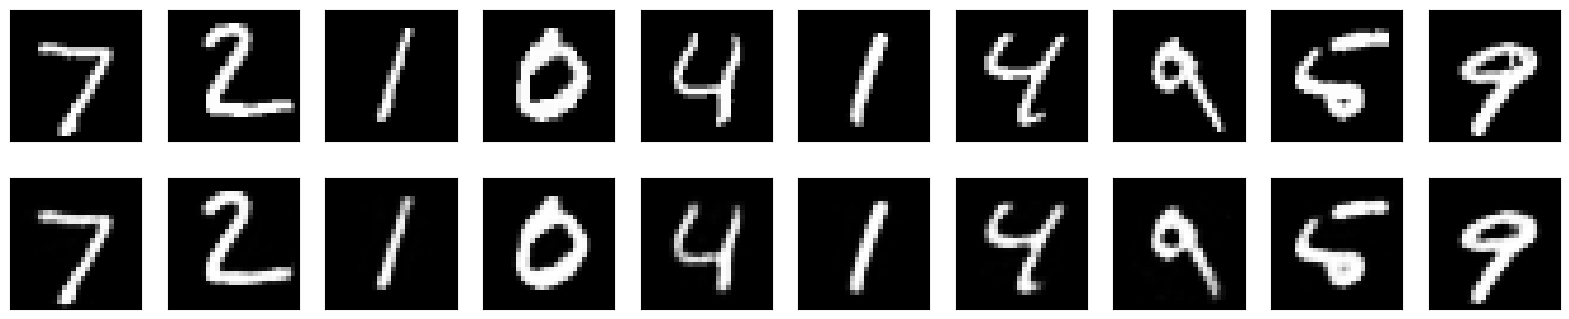

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))


# Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_flat, x_test_flat))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test_flat)

# Display the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


**b) Word Prediction using RNN**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data
sentences = [
    'I love machine learning',
    'Deep learning is fascinating',
    'Natural language processing is fun'
]

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels
input_sequences = []
for line in sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences for equal length input
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))

# Create predictors and label
X, y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Define the RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_length-1),
    tf.keras.layers.SimpleRNN(100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate text
print(generate_text("language", 3, model, max_sequence_length))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2.5399 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 2.4802 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 2.4226 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 2.3659 - accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 2.3091 - accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 2.2514 - accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 2.1922 - accuracy: 0.6000
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 2.1309 - accuracy: 0.6000
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 2.0672 - accuracy: 0.6000
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 2.0012 - accuracy: 0.7000
Epoch 11/100


**c) Image Captioning**

loading annotations into memory...
Done (t=0.92s)
creating index...
index created!


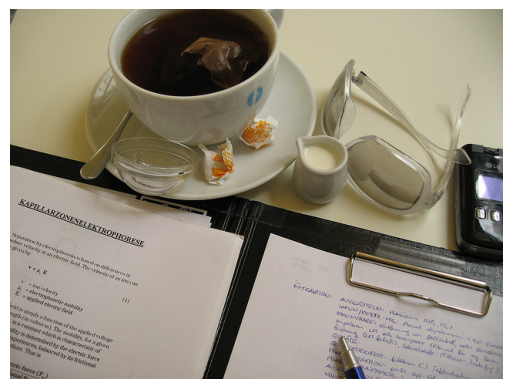

Captions:
THERE IS A CUP OF COFFEE THAT IS ON THE TABLE 
A cup of tea with a small pitcher of milk on a desk
A cup is next to a menu on a table
A cup of coffee sitting on top of a saucer.
A lot of notes in a folder sitting on a table with a pen, hot tea, sunglasses, and other items. 


In [ ]:
import numpy as np
import os
import requests
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import random

# Download the COCO annotations file
coco_annotation_url = "http://images.cocodataset.org/annotations/annotations_trainval2014.zip"
annotations_zip_file = "annotations_trainval2014.zip"
annotations_folder = "annotations"

if not os.path.exists(annotations_folder):
    os.makedirs(annotations_folder)

if not os.path.exists(os.path.join(annotations_folder, "captions_train2014.json")):
    print("Downloading COCO annotations...")
    response = requests.get(coco_annotation_url)
    with open(annotations_zip_file, "wb") as f:
        f.write(response.content)

    import zipfile
    with zipfile.ZipFile(annotations_zip_file, "r") as zip_ref:
        zip_ref.extractall(annotations_folder)

    os.remove(annotations_zip_file)

# Load COCO annotations
coco = COCO(os.path.join(annotations_folder, "annotations/captions_train2014.json"))

# Display a random image with its captions
def display_random_image_with_captions():
    # Get a random image ID from the COCO dataset
    image_ids = coco.getImgIds()
    random_image_id = random.choice(image_ids)

    image_info = coco.loadImgs(random_image_id)[0]
    image_path = os.path.join('http://images.cocodataset.org/train2014', image_info['file_name'])
    image = Image.open(requests.get(image_path, stream=True).raw)

    # Get captions for the image
    ann_ids = coco.getAnnIds(imgIds=image_info['id'])
    anns = coco.loadAnns(ann_ids)
    captions = [ann['caption'] for ann in anns]

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    print("Captions:")
    for caption in captions:
        print(caption)

# Display a random image with its captions
display_random_image_with_captions()